In [1]:
#Import Libraries required for this project
import pandas as pd
import numpy as np
import requests
import tweepy
import json 
from timeit import default_timer as timer
import ast
import os 
from functools import reduce
import matplotlib.pyplot as plt

# Data Gathering

### Import image-predictions.tsv file from URL

In [2]:
#Import the file "image-predictions.tsv"
r = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
r

<Response [200]>

In [3]:
#Save file to notebook
open('image-predictions.tsv', 'wb').write(r.content)

335079

### Import Manually downloaded file twitter-archive-enhanced.csv to Pandas Dataframe

In [4]:
#View Tweet Data from Enhanced CSV file 'Manually downloaded'
df_tweets = pd.read_csv('twitter-archive-enhanced.csv')
df_tweets

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

In [5]:
#Know how many entries for tweet_id
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Import additional Twitter data in to Json_data.txt file using Twitter API

In [ ]:
#Import Additional Twitter Data from Twitter API

#Authentication Keys #Removed Keys & Secrets for Project submission
consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'Hidden'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

 
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

#Twitter IDs to Query
tweet_ids = df_tweets.tweet_id.values
len(tweet_ids)

#Query for additional tweet data
count = 0
fails_dict = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outputfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outputfile)
            outputfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [6]:
#View Data in Pandas Dataframes 'tweet_archive_enhanced.csv'
df_tweets

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

In [7]:
df_tweets.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

### Import Data from image-predictions.tsv to Pandas Data Frame

In [8]:
#View Data in Pandas Dataframes 'image-predictions.tsv'
df_image_predict = pd.read_csv('image-predictions.tsv', sep = '\t')
df_image_predict.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

### Import json_data.txt to Pandas Data Frame

In [9]:
#View Data in Pandas Dataframes 'tweet_json.txt'

#Assign Empty List for Data Allocation from TXT file
json_data = []


In [10]:
#Read the Json Data to a Pandas Dictionary
with open('tweet_json.txt') as f:
    for line in f:
        json_data.append(json.loads(line))
        
json_data

[{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'id': 892420643555336193,
  'id_str': '892420643555336193',
  'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  'truncated': False,
  'display_text_range': [0, 85],
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'url': 'https://t.co/MgUWQ76dJU',
     'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'type': 'photo',
     'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
      'small': {'w': 540, 'h': 528, 'resize': 'fit'}

In [11]:
#convert Dictonary to DataFrame
df_json_data = pd.DataFrame(json_data)
df_json_data.head()
                            

contributors coordinates                      created_at display_text_range  \
0         None        None  Tue Aug 01 16:23:56 +0000 2017            [0, 85]   
1         None        None  Tue Aug 01 00:17:27 +0000 2017           [0, 138]   
2         None        None  Mon Jul 31 00:18:03 +0000 2017           [0, 121]   
3         None        None  Sun Jul 30 15:58:51 +0000 2017            [0, 79]   
4         None        None  Sat Jul 29 16:00:24 +0000 2017           [0, 138]   

                                            entities  \
0  {'hashtags': [], 'symbols': [], 'user_mentions...   
1  {'hashtags': [], 'symbols': [], 'user_mentions...   
2  {'hashtags': [], 'symbols': [], 'user_mentions...   
3  {'hashtags': [], 'symbols': [], 'user_mentions...   
4  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   

                                   extended_entities  favorite_count  \
0  {'media': [{'id': 892420639486877696, 'id_str'...           35711   
1  {'media': [{'id': 892177413194625024, 'id_str'...           30873   
2  {'media': [{'id': 891815175371796480, 'id_str'...           23207   
3  {'media': [{'id': 891689552724799489, 'id_str'...           38989   
4  {'media': [{'id': 891327551943041024, 'id_str'...           37261   

   favorited                                          full_text   geo  \
0      False  This is Phineas. He's a mystical boy. Only eve...  None   
1      False  This is Tilly. She's just checking pup on you....  None   
2      False  This is Archie. He is a rare Norwegian Pouncin...  None   
3      False  This is Darla. She commenced a snooze mid meal...  None   
4      False  This is Franklin. He would like you to stop ca...  None   

                         ...                          quoted_status  \
0                        ...                                    NaN   
1                        ...                                    NaN   
2                        ...                                    NaN   
3                        ...                                    NaN   
4                        ...                                    NaN   

  quoted_status_id quoted_status_id_str  quoted_status_permalink  \
0              NaN                  NaN                      NaN   
1              NaN                  NaN                      NaN   
2              NaN                  NaN                      NaN   
3              NaN                  NaN                      NaN   
4              NaN                  NaN                      NaN   

  retweet_count  retweeted retweeted_status  \
0          7549      False              NaN   
1          5594      False              NaN   
2          3705      False              NaN   
3          7722      False              NaN   
4          8332      False              NaN   

                                              source truncated  \
0  <a href="http://twitter.com/download/iphone" r...     False   
1  <a href="http://twitter.com/download/iphone" r...     False   
2  <a href="http://twitter.com/download/iphone" r...     False   
3  <a href="http://twitter.com/download/iphone" r...     False   
4  <a href="http://twitter.com/download/iphone" r...     False   

                                                user  
0  {'id': 4196983835, 'id_str': '4196983835', 'na...  
1  {'id': 4196983835, 'id_str': '4196983835', 'na...  
2  {'id': 4196983835, 'id_str': '4196983835', 'na...  
3  {'id': 4196983835, 'id_str': '4196983835', 'na...  
4  {'id': 4196983835, 'id_str': '4196983835', 'na...  

[5 rows x 32 columns]

In [12]:
df_json_data.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

# Assessing Data

#### Quality Issues:

##### df_tweets: 

- Column timestamp dtype is string
- Column retweeted_status_timestamp dtype is string
- Some tweets are retweets
- Some tweets are not dog ratings
- doggo, floofer, pupper, puppo have NaN values depicted as none
- alot of no name values in name column
- "None" is not a name of dog in names column
- some columns with all entries Nan values



##### df_json_data:

- Columns contributors, coordinates, geo are empty columns. 
- Column id name inconsistant with columns name tweet_id in df_tweets and df_image_predict
- column id (tweet_id) not at begining of table
- df_json_data table has multiple representations of id in int64 and object dtypes
- df_json all columns except retweet_count, favourate_count, id are irreleavent 

##### df_image_predict

- some predictions show that the tweeted image is not a dog. 
- entries which have 4 as img_num or wrong entry img_num value

#### Tidiness Issues: 

- df_tweets doggo, floofer, pupper, puppo are not variables
- tweet_id is spread across all data frames

In [13]:
df_tweets.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [14]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
#Check duplicated values
df_tweets.duplicated().sum()

0

In [16]:
#list of column names
df_tweets.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [17]:
#check for null values
df_tweets.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [18]:
#unique values for name column
df_tweets['name'].value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Lola          10
Tucker        10
Penny         10
Winston        9
Bo             9
Sadie          8
the            8
Toby           7
Bailey         7
Buddy          7
Daisy          7
an             7
Koda           6
Stanley        6
Jax            6
Leo            6
Jack           6
Scout          6
Milo           6
Oscar          6
Dave           6
Bella          6
Rusty          6
very           5
            ... 
Alfy           1
Brooks         1
Trigger        1
Iggy           1
Grizz          1
Tango          1
Dug            1
DonDon         1
Kevon          1
Akumi          1
Scruffers      1
Tycho          1
Josep          1
Tripp          1
Tonks          1
Laela          1
Jockson        1
Ralphy         1
Lenox          1
Shawwn         1
Jaycob         1
Jarvis         1
Rontu          1
Toffee         1
Evy            1
Ester          1
Blue           1
Pinot         

In [19]:
df_image_predict.head(20)

tweet_id                                          jpg_url  \
0   666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1   666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2   666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3   666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4   666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5   666050758794694657  https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6   666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7   666055525042405380  https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8   666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9   666058600524156928  https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10  666063827256086533  https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11  666071193221509120  https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12  666073100786774016  https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13  666082916733198337  https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14  666094000022159362  https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15  666099513787052032  https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16  666102155909144576  https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17  666104133288665088  https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18  666268910803644416  https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19  666273097616637952  https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   

    img_num                      p1   p1_conf  p1_dog                  p2  \
0         1  Welsh_springer_spaniel  0.465074    True              collie   
1         1                 redbone  0.506826    True  miniature_pinscher   
2         1         German_shepherd  0.596461    True            malinois   
3         1     Rhodesian_ridgeback  0.408143    True             redbone   
4         1      miniature_pinscher  0.560311    True          Rottweiler   
5         1    Bernese_mountain_dog  0.651137    True    English_springer   
6         1              box_turtle  0.933012   False          mud_turtle   
7         1                    chow  0.692517    True     Tibetan_mastiff   
8         1           shopping_cart  0.962465   False     shopping_basket   
9         1        miniature_poodle  0.201493    True            komondor   
10        1        golden_retriever  0.775930    True     Tibetan_mastiff   
11        1           Gordon_setter  0.503672    True   Yorkshire_terrier   
12        1            Walker_hound  0.260857    True    English_foxhound   
13        1                     pug  0.489814    True        bull_mastiff   
14        1              bloodhound  0.195217    True     German_shepherd   
15        1                   Lhasa  0.582330    True            Shih-Tzu   
16        1          English_setter  0.298617    True        Newfoundland   
17        1                     hen  0.965932   False                cock   
18        1        desktop_computer  0.086502   False                desk   
19        1       Italian_greyhound  0.176053    True         toy_terrier   

     p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0   0.156665    True            Shetland_sheepdog  0.061428    True  
1   0.074192    True          Rhodesian_ridgeback  0.072010    True  
2   0.138584    True                   bloodhound  0.116197    True  
3   0.360687    True           miniature_pinscher  0.222752    True  
4   0.243682    True                     Doberman  0.154629    True  
5   0.263788    True   Greater_Swiss_Mountain_dog  0.016199    True  
6   0.045885   False                     terrapin  0.017885   False  
7   0.058279    True                     fur_coat  0.054449   False  
8   0.014594   False             golden_retriever  0.007959    True  
9   0.192305    True  soft-coated_wheaten_terrier  0.082086    True  
10  0.093718    True           Labrador_retriever 

In [20]:
df_image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
df_image_predict.duplicated().sum()

0

In [22]:
df_image_predict.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [23]:
df_json_data.head()

contributors coordinates                      created_at display_text_range  \
0         None        None  Tue Aug 01 16:23:56 +0000 2017            [0, 85]   
1         None        None  Tue Aug 01 00:17:27 +0000 2017           [0, 138]   
2         None        None  Mon Jul 31 00:18:03 +0000 2017           [0, 121]   
3         None        None  Sun Jul 30 15:58:51 +0000 2017            [0, 79]   
4         None        None  Sat Jul 29 16:00:24 +0000 2017           [0, 138]   

                                            entities  \
0  {'hashtags': [], 'symbols': [], 'user_mentions...   
1  {'hashtags': [], 'symbols': [], 'user_mentions...   
2  {'hashtags': [], 'symbols': [], 'user_mentions...   
3  {'hashtags': [], 'symbols': [], 'user_mentions...   
4  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   

                                   extended_entities  favorite_count  \
0  {'media': [{'id': 892420639486877696, 'id_str'...           35711   
1  {'media': [{'id': 892177413194625024, 'id_str'...           30873   
2  {'media': [{'id': 891815175371796480, 'id_str'...           23207   
3  {'media': [{'id': 891689552724799489, 'id_str'...           38989   
4  {'media': [{'id': 891327551943041024, 'id_str'...           37261   

   favorited                                          full_text   geo  \
0      False  This is Phineas. He's a mystical boy. Only eve...  None   
1      False  This is Tilly. She's just checking pup on you....  None   
2      False  This is Archie. He is a rare Norwegian Pouncin...  None   
3      False  This is Darla. She commenced a snooze mid meal...  None   
4      False  This is Franklin. He would like you to stop ca...  None   

                         ...                          quoted_status  \
0                        ...                                    NaN   
1                        ...                                    NaN   
2                        ...                                    NaN   
3                        ...                                    NaN   
4                        ...                                    NaN   

  quoted_status_id quoted_status_id_str  quoted_status_permalink  \
0              NaN                  NaN                      NaN   
1              NaN                  NaN                      NaN   
2              NaN                  NaN                      NaN   
3              NaN                  NaN                      NaN   
4              NaN                  NaN                      NaN   

  retweet_count  retweeted retweeted_status  \
0          7549      False              NaN   
1          5594      False              NaN   
2          3705      False              NaN   
3          7722      False              NaN   
4          8332      False              NaN   

                                              source truncated  \
0  <a href="http://twitter.com/download/iphone" r...     False   
1  <a href="http://twitter.com/download/iphone" r...     False   
2  <a href="http://twitter.com/download/iphone" r...     False   
3  <a href="http://twitter.com/download/iphone" r...     False   
4  <a href="http://twitter.com/download/iphone" r...     False   

                                                user  
0  {'id': 4196983835, 'id_str': '4196983835', 'na...  
1  {'id': 4196983835, 'id_str': '4196983835', 'na...  
2  {'id': 4196983835, 'id_str': '4196983835', 'na...  
3  {'id': 4196983835, 'id_str': '4196983835', 'na...  
4  {'id': 4196983835, 'id_str': '4196983835', 'na...  

[5 rows x 32 columns]

In [24]:
df_json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2331 non-null object
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null bool
full_text                        2331 non-null object
geo                              0 non-null object
id                               2331 non-null int64
id_str                           2331 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null obj

In [25]:
df_json_data['id'].duplicated().sum()

0

In [26]:
df_json_data['id'].nunique()

2331

In [27]:
df_json_data.isnull().sum()

contributors                     2331
coordinates                      2331
created_at                          0
display_text_range                  0
entities                            0
extended_entities                 272
favorite_count                      0
favorited                           0
full_text                           0
geo                              2331
id                                  0
id_str                              0
in_reply_to_screen_name          2254
in_reply_to_status_id            2254
in_reply_to_status_id_str        2254
in_reply_to_user_id              2254
in_reply_to_user_id_str          2254
is_quote_status                     0
lang                                0
place                            2330
possibly_sensitive                135
possibly_sensitive_appealable     135
quoted_status                    2307
quoted_status_id                 2305
quoted_status_id_str             2305
quoted_status_permalink          2305
retweet_coun

# Cleaning Data

## Define

#### Clean df_tweets

#### Quality Issues:

- change data type for timestamp from string to datetime
- change data type for retweeted_status_timestamp from string to datetime
- Drop entries (tweets) which begin with "RT @" as they are retweets & Dropping tweets where values of columns in_reply_to_status_id are non null  
- Drop tweets that are not dog ratings by checking the text of the tweet for strings "we only rate dogs" & "don't rate"
- doggo, floofer, pupper, puppo none entires change to empty strings
- Change not names "lowercase" entires in name column to Nan
- Change "None" to Nan in names column
- drop columns with all entries that are Nan values

##### Clean df_json_data:

- drop empty columns from data set df_json_data 
- change column name id in df_json_data to tweet_id
- rearrange column tweet_id to become the first column in the table
- drop multiple representations of the same information
- Drop irreleavnet columns from df_json_data

##### Clean df_image_predict

- drop entries that dont have dog images by passing condtion p1_dog, p2_dog, p3_dog False entries. 
- fix entries which have 4 as img_num or wrong img_num value by making a new column and iterating through the confidence levels of each image.  

#### Clean Tidiness Issues: 

- combine df_tweets doggo, floofer, pupper, puppo in to "stage" column
- join df_tweets with df_json_data & df_image_predict

## Code & Test

#### Copy Dataframes

In [28]:
# dftc = df_tweets_clean
# dftipc = df_image_predict_clean
# dfjdc = df_json_data_clean

#Copy data frames for cleaning purposes
dftc = df_tweets.copy()
dfipc = df_image_predict.copy()
dfjdc = df_json_data.copy()

### Clean df_tweets
#### Define
- Change data type of time stamp column to datetime
- change data type for retweeted_status_timestamp from string to datetime

#### Code

In [29]:
#Change data type of time stamp column to datetime
dftc['timestamp']= pd.to_datetime(dftc['timestamp'])

# change data type for retweeted_status_timestamp from string to datetime
dftc['retweeted_status_timestamp']= pd.to_datetime(dftc['retweeted_status_timestamp'])


#### Test

In [30]:
dftc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime

#### Define
- Drop entries (tweets) which begin with "RT @" as they are retweets & Dropping tweets where values of columns in_reply_to_status_id are non null
- Drop tweets that are not dog ratings by checking the text of the tweet for strings "we only rate dogs" & "don't rate"

#### Code

In [31]:
# Drop entries (tweets) which contain "RT @" as they are retweets
dftc = dftc[~dftc.text.str.contains("RT @")]

In [32]:
# Drop entries (tweets) which contain "we only rate dogs" as they are not dog ratings
dftc = dftc[~dftc.text.str.contains("we only rate dogs")]

In [33]:
# Drop entries (tweets) which contain "don't rate" as they are not dog ratings
dftc = dftc[~dftc.text.str.contains("don't rate")]

In [34]:
#Drop Entries from in_reply_to_status_id which have values as they are retweets 
dftc = dftc.drop(dftc[(dftc['in_reply_to_status_id'] > 0)].index)

#### Test

In [35]:
dftc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2079 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2079 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2079 non-null datetime64[ns]
source                        2079 non-null object
text                          2079 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2076 non-null object
rating_numerator              2079 non-null int64
rating_denominator            2079 non-null int64
name                          2079 non-null object
doggo                         2079 non-null object
floofer                       2079 non-null object
pupper                        2079 non-null object
puppo                         2079 non-null object
dtypes: datetime64[ns](2

#### Define
- doggo, floofer, pupper, puppo none entires change to NaN

#### Code

In [36]:
# doggo, floofer, pupper, puppo None entires change to empty strings
dftc.doggo.replace('None', '', inplace=True)

In [37]:
dftc.floofer.replace('None', '', inplace=True)

In [38]:
dftc.pupper.replace('None', '', inplace=True)

In [39]:
dftc.puppo.replace('None', '', inplace=True)

#### Test

In [40]:
dftc.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2079
in_reply_to_user_id           2079
timestamp                        0
source                           0
text                             0
retweeted_status_id           2079
retweeted_status_user_id      2079
retweeted_status_timestamp    2079
expanded_urls                    3
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

#### Define
- Drop 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id' as all are null values

#### Code

In [41]:
# Drop retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp as all are null values
dftc.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1,  inplace = True)

#### Test

In [42]:
dftc.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [43]:
dftc['name'].value_counts()

None          587
a              55
Charlie        11
Lucy           11
Oliver         10
Cooper         10
Tucker          9
Penny           9
Lola            8
Sadie           8
Winston         8
the             8
Toby            7
Daisy           7
Stanley         6
Bella           6
Jax             6
Koda            6
an              6
Oscar           6
Bo              6
Bailey          6
Buddy           5
Rusty           5
Leo             5
Chester         5
Bentley         5
Scout           5
Milo            5
Louis           5
             ... 
Hurley          1
Blu             1
Berkeley        1
Fillup          1
Pawnd           1
Evy             1
Kaia            1
Toffee          1
Brandonald      1
Birf            1
Cecil           1
Crimson         1
Thor            1
Stewie          1
DonDon          1
Akumi           1
Scruffers       1
Tycho           1
Josep           1
Tripp           1
Tonks           1
Laela           1
Jockson         1
Ralphy          1
Kevon     

#### Define
- Change not names "lowercase" entires in name column to NaN
- Chane "None" to NaN

#### Code

In [44]:
dftc.loc[dftc['name'] == dftc['name'].str.lower(), 'name'] = np.nan

In [45]:
# Change None values in name column to Nan
dftc['name'] = dftc['name'].replace(r'None', np.nan, regex=True)

#### Test

In [46]:
dftc['name'].value_counts()

Lucy          11
Charlie       11
Oliver        10
Cooper        10
Penny          9
Tucker         9
Lola           8
Winston        8
Sadie          8
Daisy          7
Toby           7
Bailey         6
Bella          6
Jax            6
Koda           6
Stanley        6
Bo             6
Oscar          6
Milo           5
Chester        5
Buddy          5
Rusty          5
Dave           5
Scout          5
Bentley        5
Leo            5
Louis          5
Clarence       4
Gus            4
Duke           4
              ..
Georgie        1
Rodney         1
Roscoe         1
Randall        1
Geno           1
Jarvis         1
Jaycob         1
Lenox          1
Thor           1
Chef           1
Bubba          1
Shiloh         1
Hector         1
Kaia           1
Brandonald     1
Birf           1
Cecil          1
Crimson        1
Stewie         1
Kevon          1
DonDon         1
Akumi          1
Tycho          1
Josep          1
Tripp          1
Tonks          1
Laela          1
Jockson       

In [47]:
dftc['name'].isnull().sum()

690

In [48]:
dftc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2079 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2079 non-null int64
timestamp             2079 non-null datetime64[ns]
source                2079 non-null object
text                  2079 non-null object
expanded_urls         2076 non-null object
rating_numerator      2079 non-null int64
rating_denominator    2079 non-null int64
name                  1389 non-null object
doggo                 2079 non-null object
floofer               2079 non-null object
pupper                2079 non-null object
puppo                 2079 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 211.1+ KB


#### Define
- combine df_tweets doggo, floofer, pupper, puppo into "stage" column

#### Code

In [49]:
# Combine the four stages
dftc['stage'] = dftc.doggo + dftc.floofer + dftc.pupper + dftc.puppo

In [50]:
# Format entries with multiple dog stages
dftc.loc[dftc.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
dftc.loc[dftc.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
dftc.loc[dftc.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

#### Test

In [51]:
dftc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2079 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2079 non-null int64
timestamp             2079 non-null datetime64[ns]
source                2079 non-null object
text                  2079 non-null object
expanded_urls         2076 non-null object
rating_numerator      2079 non-null int64
rating_denominator    2079 non-null int64
name                  1389 non-null object
doggo                 2079 non-null object
floofer               2079 non-null object
pupper                2079 non-null object
puppo                 2079 non-null object
stage                 2079 non-null object
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 227.4+ KB


In [52]:
dftc.sample(20)

tweet_id           timestamp  \
1182  718971898235854848 2016-04-10 01:20:33   
504   813051746834595840 2016-12-25 16:00:16   
1997  672591271085670400 2015-12-04 01:40:29   
270   841314665196081154 2017-03-13 15:47:01   
1805  676942428000112642 2015-12-16 01:50:26   
459   817827839487737858 2017-01-07 20:18:46   
88    875097192612077568 2017-06-14 21:06:43   
1826  676440007570247681 2015-12-14 16:34:00   
2010  672248013293752320 2015-12-03 02:56:30   
793   773547596996571136 2016-09-07 15:44:53   
1237  712309440758808576 2016-03-22 16:06:19   
1787  677565715327688705 2015-12-17 19:07:09   
1472  693942351086120961 2016-01-31 23:42:03   
2273  667470559035432960 2015-11-19 22:32:36   
1614  685307451701334016 2016-01-08 03:50:03   
941   752932432744185856 2016-07-12 18:27:35   
1390  700151421916807169 2016-02-18 02:54:41   
845   766423258543644672 2016-08-18 23:55:18   
1336  705223444686888960 2016-03-03 02:49:06   
1955  673636718965334016 2015-12-06 22:54:44   

                                                 source  \
1182  <a href="http://twitter.com/download/iphone" r...   
504   <a href="http://twitter.com/download/iphone" r...   
1997  <a href="http://twitter.com/download/iphone" r...   
270   <a href="http://twitter.com" rel="nofollow">Tw...   
1805  <a href="http://twitter.com/download/iphone" r...   
459   <a href="http://twitter.com/download/iphone" r...   
88    <a href="http://twitter.com/download/iphone" r...   
1826  <a href="http://twitter.com/download/iphone" r...   
2010  <a href="http://twitter.com/download/iphone" r...   
793   <a href="http://twitter.com/download/iphone" r...   
1237  <a href="http://twitter.com/download/iphone" r...   
1787  <a href="http://twitter.com/download/iphone" r...   
1472  <a href="http://twitter.com/download/iphone" r...   
2273  <a href="http://twitter.com" rel="nofollow">Tw...   
1614  <a href="http://twitter.com/download/iphone" r...   
941   <a href="http://vine.co" rel="nofollow">Vine -...   
1390  <a href="http://twitter.com/download/iphone" r...   
845   <a href="http://twitter.com/download/iphone" r...   
1336  <a href="http://twitter.com/download/iphone" r...   
1955  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
1182  This is Sadie. She is prepared for battle. 10/...   
504   This is Bauer. He had nothing to do with the c...   
1997  Lots of pups here. All are Judea Hazelnuts. Ex...   
270   This is Max. There's no way in h*ck you're tak...   
1805  Who leaves the last cupcake just sitting there...   
459   This is Buddy. He ran into a glass door once. ...   
88    You'll get your package when that precious man...   
1826  Hope your Monday isn't too awful. Here's two b...   
2010  10/10 for dog. 7/10 for cat. 12/10 for human. ...   
793   This is Chelsea. She forgot how to dog. 11/10 ...   
1237  Reminder that we made our first set of sticker...   
1787  Contortionist pup here. Inside pentagram. Clea...   
1472  This is Kobe. He's a Speckled Rorschach. Reque...   
2273  This is a northern Wahoo named Kohl. He runs t...   
1614  Say hello to Petrick. He's an Altostratus Floo...   
941   This is Carl. He's very powerful. 12/10 don't ...   
1390  If a pupper gave that to me I'd probably start...   
845   This is Shadoe. Her tongue flies out of her mo...   
1336  This is Bode. He's a heavy sleeper. 9/10 https...   
1955  This is a Lofted Aphrodisiac Terrier named Kip...   

                                          expanded_urls  rating_numerator  \
1182  https://twitter.com/dog_rates/status/718971898...                10   
504   https://twitter.com/dog_rates/status/813051746...                13   
1997  https://twitter.com/dog_rates/status/672591271...                 8   
270   https://twitter.com/dog_rates/status/841314665...                13   
1805  https://twitter.com/dog_rates/status/676942428...                 9   
459   https://twitter.com/dog_rates/status/817827839...          

### Clean df_image_predict

#### Define
- drop entries that dont have dog images by passing condtion p1_dog, p2_dog, p3_dog False entries.  

#### Code

In [53]:
# drop entries that dont have dog images by passing condtion p1_dog, p2_dog, p3_dog False entries in dfipc
dfipc = dfipc.drop(dfipc[(dfipc['p1_dog'] == False) & (dfipc['p2_dog'] == False) & (dfipc['p3_dog'] == False)].index)

#### Test

In [54]:
dfipc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1751 non-null int64
jpg_url     1751 non-null object
img_num     1751 non-null int64
p1          1751 non-null object
p1_conf     1751 non-null float64
p1_dog      1751 non-null bool
p2          1751 non-null object
p2_conf     1751 non-null float64
p2_dog      1751 non-null bool
p3          1751 non-null object
p3_conf     1751 non-null float64
p3_dog      1751 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 141.9+ KB


#### Define
- fix entries which have 4 as img_num or wrong img_num value by making a new column and iterating through the confidence levels of each image. 

#### Code

In [55]:
# Fix the issues with wrong results in img_num & drop the column
conditions = [
    (dfipc['p1_dog'] == True),
    (dfipc['p2_dog'] == True),
    (dfipc['p3_dog'] == True)]

# create a list of the values we want to assign for each condition
values = [1, 2, 3]

# create a new column and use np.select to assign values to it using our lists as arguments
dfipc['dog_image_result'] = np.select(conditions, values)

In [56]:
# Drop img_num
dfipc.drop(['img_num'], axis = 1,  inplace = True)

#### Test

In [57]:
# display updated DataFrame
dfipc.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

                       p1   p1_conf  p1_dog                  p2   p2_conf  \
0  Welsh_springer_spaniel  0.465074    True              collie  0.156665   
1                 redbone  0.506826    True  miniature_pinscher  0.074192   
2         German_shepherd  0.596461    True            malinois  0.138584   
3     Rhodesian_ridgeback  0.408143    True             redbone  0.360687   
4      miniature_pinscher  0.560311    True          Rottweiler  0.243682   

   p2_dog                   p3   p3_conf  p3_dog  dog_image_result  
0    True    Shetland_sheepdog  0.061428    True                 1  
1    True  Rhodesian_ridgeback  0.072010    True                 1  
2    True           bloodhound  0.116197    True                 1  
3    True   miniature_pinscher  0.222752    True                 1  
4    True             Doberman  0.154629    True                 1

#### Test

In [58]:
dfipc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id            1751 non-null int64
jpg_url             1751 non-null object
p1                  1751 non-null object
p1_conf             1751 non-null float64
p1_dog              1751 non-null bool
p2                  1751 non-null object
p2_conf             1751 non-null float64
p2_dog              1751 non-null bool
p3                  1751 non-null object
p3_conf             1751 non-null float64
p3_dog              1751 non-null bool
dog_image_result    1751 non-null int64
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 141.9+ KB


### Clean df_json_data

#### Define
- drop empty columns from data set df_json_data & Drop irreleavnet columns from df_json_data

#### Code

In [59]:
#Drop empty columns and irreleavent columns 
dfjdc.drop(['contributors', 'coordinates', 'geo', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'place', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink', 'retweeted_status'], axis = 1,  inplace = True)

#### Test

In [60]:
dfjdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 18 columns):
created_at                       2331 non-null object
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null bool
full_text                        2331 non-null object
id                               2331 non-null int64
id_str                           2331 non-null object
is_quote_status                  2331 non-null bool
lang                             2331 non-null object
possibly_sensitive               2196 non-null object
possibly_sensitive_appealable    2196 non-null object
retweet_count                    2331 non-null int64
retweeted                        2331 non-null bool
source                           2331 non-null object
truncated                        2331 

#### Define
- change column name id in df_json_data to tweet_id

#### Code

In [61]:
#rename id to tweet_id
dfjdc.rename(columns={'id': 'tweet_id'}, inplace=True)

#### Test

In [62]:
dfjdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 18 columns):
created_at                       2331 non-null object
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null bool
full_text                        2331 non-null object
tweet_id                         2331 non-null int64
id_str                           2331 non-null object
is_quote_status                  2331 non-null bool
lang                             2331 non-null object
possibly_sensitive               2196 non-null object
possibly_sensitive_appealable    2196 non-null object
retweet_count                    2331 non-null int64
retweeted                        2331 non-null bool
source                           2331 non-null object
truncated                        2331 

#### Define
- drop multiple representations of the same information

#### Code

In [63]:
#drop multiple representation of tweet_id (id_str)
dfjdc.drop(['id_str'], axis = 1,  inplace = True)

#### Test

In [64]:
dfjdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 17 columns):
created_at                       2331 non-null object
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null bool
full_text                        2331 non-null object
tweet_id                         2331 non-null int64
is_quote_status                  2331 non-null bool
lang                             2331 non-null object
possibly_sensitive               2196 non-null object
possibly_sensitive_appealable    2196 non-null object
retweet_count                    2331 non-null int64
retweeted                        2331 non-null bool
source                           2331 non-null object
truncated                        2331 non-null bool
user                             2331 no

#### Define
- rearrange column tweet_id to become the first column in the table

#### Code

In [65]:
#Rearrange columns to make tweet_id first column
cols = dfjdc.columns.tolist()
cols

['created_at',
 'display_text_range',
 'entities',
 'extended_entities',
 'favorite_count',
 'favorited',
 'full_text',
 'tweet_id',
 'is_quote_status',
 'lang',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'retweet_count',
 'retweeted',
 'source',
 'truncated',
 'user']

In [66]:
cols = cols[7:-1] + cols[:7]
cols

['tweet_id',
 'is_quote_status',
 'lang',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'retweet_count',
 'retweeted',
 'source',
 'truncated',
 'created_at',
 'display_text_range',
 'entities',
 'extended_entities',
 'favorite_count',
 'favorited',
 'full_text']

In [67]:
dfjdc = dfjdc[cols]

#### Test

In [68]:
dfjdc.head()

tweet_id  is_quote_status lang possibly_sensitive  \
0  892420643555336193            False   en              False   
1  892177421306343426            False   en              False   
2  891815181378084864            False   en              False   
3  891689557279858688            False   en              False   
4  891327558926688256            False   en              False   

  possibly_sensitive_appealable  retweet_count  retweeted  \
0                         False           7549      False   
1                         False           5594      False   
2                         False           3705      False   
3                         False           7722      False   
4                         False           8332      False   

                                              source  truncated  \
0  <a href="http://twitter.com/download/iphone" r...      False   
1  <a href="http://twitter.com/download/iphone" r...      False   
2  <a href="http://twitter.com/download/iphone" r...      False   
3  <a href="http://twitter.com/download/iphone" r...      False   
4  <a href="http://twitter.com/download/iphone" r...      False   

                       created_at display_text_range  \
0  Tue Aug 01 16:23:56 +0000 2017            [0, 85]   
1  Tue Aug 01 00:17:27 +0000 2017           [0, 138]   
2  Mon Jul 31 00:18:03 +0000 2017           [0, 121]   
3  Sun Jul 30 15:58:51 +0000 2017            [0, 79]   
4  Sat Jul 29 16:00:24 +0000 2017           [0, 138]   

                                            entities  \
0  {'hashtags': [], 'symbols': [], 'user_mentions...   
1  {'hashtags': [], 'symbols': [], 'user_mentions...   
2  {'hashtags': [], 'symbols': [], 'user_mentions...   
3  {'hashtags': [], 'symbols': [], 'user_mentions...   
4  {'hashtags': [{'text': 'BarkWeek', 'indices': ...   

                                   extended_entities  favorite_count  \
0  {'media': [{'id': 892420639486877696, 'id_str'...           35711   
1  {'media': [{'id': 892177413194625024, 'id_str'...           30873   
2  {'media': [{'id': 891815175371796480, 'id_str'...           23207   
3  {'media': [{'id': 891689552724799489, 'id_str'...           38989   
4  {'media': [{'id': 891327551943041024, 'id_str'...           37261   

   favorited                                          full_text  
0      False  This is Phineas. He's a mystical boy. Only eve...  
1      False  This is Tilly. She's just checking pup on you....  
2      False  This is Archie. He is a rare Norwegian Pouncin...  
3      False  This is Darla. She commenced a snooze mid meal...  
4      False  This is Franklin. He would like you to stop ca...

In [69]:
dfjdc.columns

Index(['tweet_id', 'is_quote_status', 'lang', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'retweet_count', 'retweeted', 'source',
       'truncated', 'created_at', 'display_text_range', 'entities',
       'extended_entities', 'favorite_count', 'favorited', 'full_text'],
      dtype='object')

#### Define
- Drop Irreleavent Columns

#### Code

In [70]:
# drop more irreleavent columns and repeated columns from dfjdc
dfjdc.drop(['is_quote_status', 'possibly_sensitive_appealable', 'possibly_sensitive', 'retweeted', 'truncated', 'created_at', 'entities', 'extended_entities', 'favorited', 'full_text'], axis = 1,  inplace = True)

#### Test

In [71]:
dfjdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
tweet_id              2331 non-null int64
lang                  2331 non-null object
retweet_count         2331 non-null int64
source                2331 non-null object
display_text_range    2331 non-null object
favorite_count        2331 non-null int64
dtypes: int64(3), object(3)
memory usage: 109.3+ KB


#### Define
- Join all three data frames in df_clean_master

#### Code

In [72]:
#join dftc and dfjdc
df_clean_master1 = pd.merge(dftc, dfjdc)

In [73]:
#join df_clean_master1 and dfipc
df_clean_master = pd.merge(df_clean_master1, dfipc)

#### Test

In [74]:
df_clean_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1647 entries, 0 to 1646
Data columns (total 28 columns):
tweet_id              1647 non-null int64
timestamp             1647 non-null datetime64[ns]
source                1647 non-null object
text                  1647 non-null object
expanded_urls         1647 non-null object
rating_numerator      1647 non-null int64
rating_denominator    1647 non-null int64
name                  1179 non-null object
doggo                 1647 non-null object
floofer               1647 non-null object
pupper                1647 non-null object
puppo                 1647 non-null object
stage                 1647 non-null object
lang                  1647 non-null object
retweet_count         1647 non-null int64
display_text_range    1647 non-null object
favorite_count        1647 non-null int64
jpg_url               1647 non-null object
p1                    1647 non-null object
p1_conf               1647 non-null float64
p1_dog                1647 no

## Store

In [75]:
# Store the cleaned data frame in "twitter_archive_master.csv"
df_clean_master.to_csv('twitter_archive_master.csv', index = False)

## Analyze

- Most Retweeted Tweet
- Most Favourited Tweet
- Most Used Language for Tweeting
- Most Used Platform for Tweeting (Iphone, Web Client, Tweet Deck)
- Most Rated Dog
- Lowest Rated Dog
- Average Retweet for WeRateDogs
- Average Favourite for WeRateDogs

In [76]:
# Most Retweeted Tweet
df_clean_master.loc[df_clean_master['retweet_count'].idxmax()]

tweet_id                                             744234799360020481
timestamp                                           2016-06-18 18:26:18
source                <a href="http://twitter.com/download/iphone" r...
text                  Here's a doggo realizing you can stand in a po...
expanded_urls         https://twitter.com/dog_rates/status/744234799...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                                NaN
doggo                                                             doggo
floofer                                                                
pupper                                                                 
puppo                                                                  
stage                                                             doggo
lang                                                            

In [77]:
# Most Favourited Tweet
df_clean_master.loc[df_clean_master['favorite_count'].idxmax()]

tweet_id                                             744234799360020481
timestamp                                           2016-06-18 18:26:18
source                <a href="http://twitter.com/download/iphone" r...
text                  Here's a doggo realizing you can stand in a po...
expanded_urls         https://twitter.com/dog_rates/status/744234799...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                                NaN
doggo                                                             doggo
floofer                                                                
pupper                                                                 
puppo                                                                  
stage                                                             doggo
lang                                                            

In [78]:
# Most Used Language for Tweeting
df_clean_master.lang.value_counts()

en    1642
nl       3
eu       1
et       1
Name: lang, dtype: int64

In [79]:
# Most Used Platform for Tweeting (Iphone, Web Client, Vino, Tweet Deck)
df_clean_master.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1617
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       22
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       8
Name: source, dtype: int64

In [80]:
# New column for calculating highest and lowest rating
df_clean_master['rating'] = df_clean_master['rating_numerator'] / df_clean_master['rating_denominator']

In [81]:
# Most Rated Dog
df_clean_master.loc[df_clean_master['rating'].idxmax()]

tweet_id                                             786709082849828864
timestamp                                           2016-10-13 23:23:56
source                <a href="http://twitter.com/download/iphone" r...
text                  This is Logan, the Chow who lived. He solemnly...
expanded_urls         https://twitter.com/dog_rates/status/786709082...
rating_numerator                                                     75
rating_denominator                                                   10
name                                                              Logan
doggo                                                                  
floofer                                                                
pupper                                                                 
puppo                                                                  
stage                                                                  
lang                                                            

In [82]:
# Lowest rating dog
df_clean_master.loc[df_clean_master['rating'].idxmin()]

tweet_id                                             835152434251116546
timestamp                                           2017-02-24 15:40:31
source                <a href="http://twitter.com/download/iphone" r...
text                  When you're so blinded by your systematic plag...
expanded_urls         https://twitter.com/dog_rates/status/835152434...
rating_numerator                                                      0
rating_denominator                                                   10
name                                                                NaN
doggo                                                                  
floofer                                                                
pupper                                                                 
puppo                                                                  
stage                                                                  
lang                                                            

In [83]:
#Average retweets for WeRateDogs
df_clean_master['retweet_count'].mean()

2458.2131147540986

In [84]:
#Average favourite (likes) for WeRateDogs
df_clean_master['favorite_count'].mean()

8474.8803885853067

# Visualize

- Tweet Activity per Year
- Tweet Activity per Month for the period from 2015 to 2017
- Top 10 dogs that are tweeted

In [85]:
#Split days, months & years
# datetime series:
datetimes = pd.to_datetime(df_clean_master['timestamp'])

# assign new columns
df_clean_master['day'] = datetimes.dt.day
df_clean_master['month'] = datetimes.dt.month
df_clean_master['year'] = datetimes.dt.year

In [86]:
df_clean_master.head()

tweet_id           timestamp  \
0  892177421306343426 2017-08-01 00:17:27   
1  891815181378084864 2017-07-31 00:18:03   
2  891689557279858688 2017-07-30 15:58:51   
3  891327558926688256 2017-07-29 16:00:24   
4  891087950875897856 2017-07-29 00:08:17   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Tilly. She's just checking pup on you....   
1  This is Archie. He is a rare Norwegian Pouncin...   
2  This is Darla. She commenced a snooze mid meal...   
3  This is Franklin. He would like you to stop ca...   
4  Here we have a majestic great white breaching ...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892177421...                13   
1  https://twitter.com/dog_rates/status/891815181...                12   
2  https://twitter.com/dog_rates/status/891689557...                13   
3  https://twitter.com/dog_rates/status/891327558...                12   
4  https://twitter.com/dog_rates/status/891087950...                13   

   rating_denominator      name doggo floofer  ...    p2_conf p2_dog  \
0                  10     Tilly                ...   0.090647   True   
1                  10    Archie                ...   0.078253   True   
2                  10     Darla                ...   0.168086   True   
3                  10  Franklin                ...   0.225770   True   
4                  10       NaN                ...   0.116317   True   

                            p3   p3_conf  p3_dog dog_image_result  rating day  \
0                     papillon  0.068957    True                1     1.3   1   
1                       kelpie  0.031379    True                1     1.2  31   
2                      spatula  0.040836   False                2     1.3  30   
3  German_short-haired_pointer  0.175219    True                1     1.2  29   
4              Indian_elephant  0.076902   False                1     1.3  29   

  month  year  
0     8  2017  
1     7  2017  
2     7  2017  
3     7  2017  
4     7  2017  

[5 rows x 32 columns]

In [87]:
#Groupby years and count tweets per year
year = df_clean_master.groupby('year')
yearcount = year['tweet_id'].count()
timedict = yearcount.to_dict()

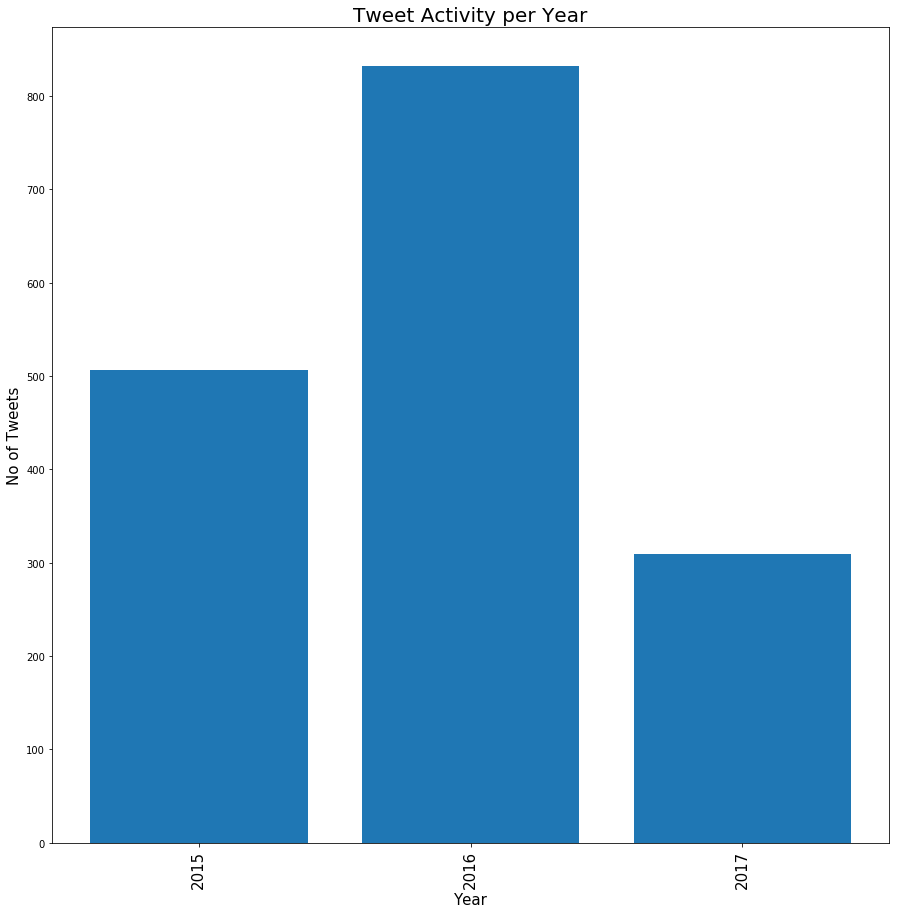

In [96]:
#plot years with number of tweets
viz1 = plt.figure(figsize = (15,15))
plt.bar(list(timedict.keys()), list(timedict.values()))
plt.xlabel('Year', fontsize = 15)
plt.ylabel('No of Tweets', fontsize=15)
plt.xticks(list(timedict.keys()), fontsize=15, rotation=90)
plt.title('Tweet Activity per Year', fontsize = 20)
plt.savefig('Tweet Activity per Year'+".jpg")
plt.show()

In [89]:
#Groupby months and count tweets per month
month = df_clean_master.groupby('month')
monthcount = month['tweet_id'].count()
timedict1 = monthcount.to_dict()

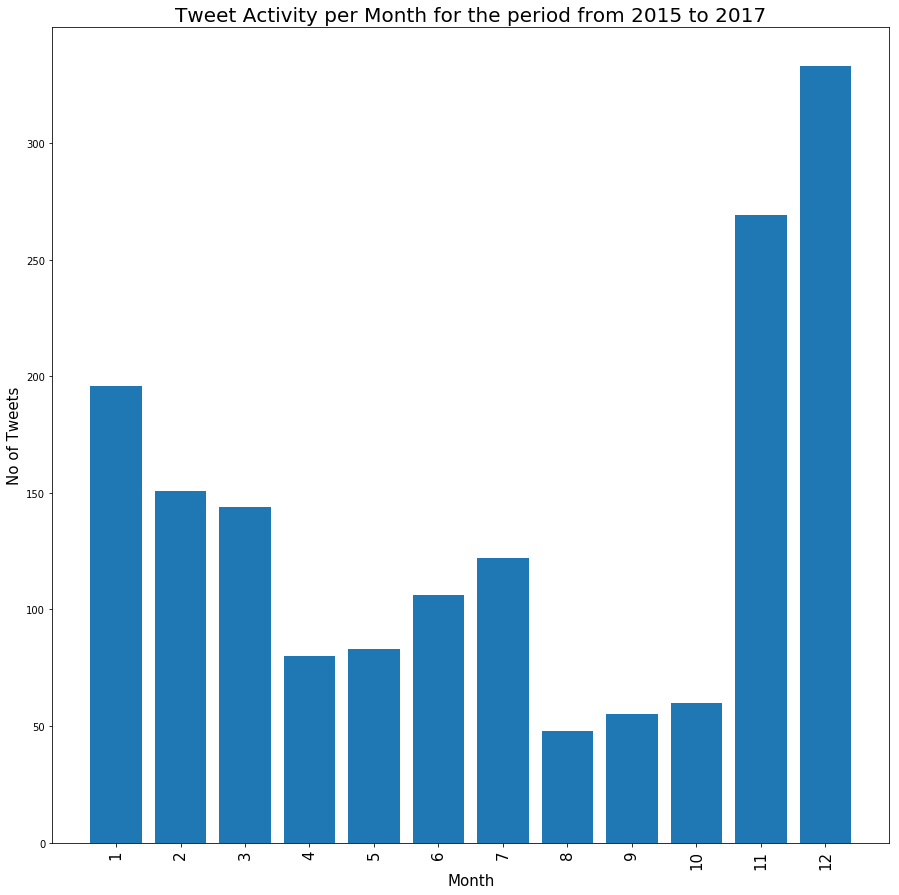

In [97]:
#plot month with number of tweets
viz2 = plt.figure(figsize = (15,15))
plt.bar(list(timedict1.keys()), list(timedict1.values()))
plt.xlabel('Month', fontsize = 15)
plt.ylabel('No of Tweets', fontsize=15)
plt.xticks(list(timedict1.keys()), fontsize=15, rotation=90)
plt.title('Tweet Activity per Month for the period from 2015 to 2017', fontsize = 20)
plt.savefig('Tweet Activity per Month'+".jpg")
plt.show()

In [91]:
# Vizualize the number of dogs by type and their tweet numbers
df_clean_master['dog_image_result'].value_counts()

1    1444
2     143
3      60
Name: dog_image_result, dtype: int64

In [92]:
#Copy dataframe
df_image = df_clean_master.copy()

In [93]:
#assign new column with results
dd = {1:'p1', 2:'p2', 3:'p3'}

df_image['result'] = df_image.lookup(df_image.index, df_image['dog_image_result'].map(dd))
df_image

tweet_id           timestamp  \
0     892177421306343426 2017-08-01 00:17:27   
1     891815181378084864 2017-07-31 00:18:03   
2     891689557279858688 2017-07-30 15:58:51   
3     891327558926688256 2017-07-29 16:00:24   
4     891087950875897856 2017-07-29 00:08:17   
5     890971913173991426 2017-07-28 16:27:12   
6     890729181411237888 2017-07-28 00:22:40   
7     890609185150312448 2017-07-27 16:25:51   
8     890240255349198849 2017-07-26 15:59:51   
9     890006608113172480 2017-07-26 00:31:25   
10    889880896479866881 2017-07-25 16:11:53   
11    889665388333682689 2017-07-25 01:55:32   
12    889638837579907072 2017-07-25 00:10:02   
13    889531135344209921 2017-07-24 17:02:04   
14    889278841981685760 2017-07-24 00:19:32   
15    888917238123831296 2017-07-23 00:22:39   
16    888804989199671297 2017-07-22 16:56:37   
17    888554962724278272 2017-07-22 00:23:06   
18    888078434458587136 2017-07-20 16:49:33   
19    887705289381826560 2017-07-19 16:06:48   
20    887473957103951883 2017-07-19 00:47:34   
21    887343217045368832 2017-07-18 16:08:03   
22    887101392804085760 2017-07-18 00:07:08   
23    886983233522544640 2017-07-17 16:17:36   
24    886736880519319552 2017-07-16 23:58:41   
25    886366144734445568 2017-07-15 23:25:31   
26    886258384151887873 2017-07-15 16:17:19   
27    885984800019947520 2017-07-14 22:10:11   
28    885528943205470208 2017-07-13 15:58:47   
29    885167619883638784 2017-07-12 16:03:00   
...                  ...                 ...   
1617  666437273139982337 2015-11-17 02:06:42   
1618  666435652385423360 2015-11-17 02:00:15   
1619  666430724426358785 2015-11-17 01:40:41   
1620  666428276349472768 2015-11-17 01:30:57   
1621  666421158376562688 2015-11-17 01:02:40   
1622  666418789513326592 2015-11-17 00:53:15   
1623  666407126856765440 2015-11-17 00:06:54   
1624  666396247373291520 2015-11-16 23:23:41   
1625  666373753744588802 2015-11-16 21:54:18   
1626  666353288456101888 2015-11-16 20:32:58   
1627  666345417576210432 2015-11-16 20:01:42   
1628  666337882303524864 2015-11-16 19:31:45   
1629  666287406224695296 2015-11-16 16:11:11   
1630  666273097616637952 2015-11-16 15:14:19   
1631  666102155909144576 2015-11-16 03:55:04   
1632  666099513787052032 2015-11-16 03:44:34   
1633  666094000022159362 2015-11-16 03:22:39   
1634  666082916733198337 2015-11-16 02:38:37   
1635  666073100786774016 2015-11-16 01:59:36   
1636  666071193221509120 2015-11-16 01:52:02   
1637  666063827256086533 2015-11-16 01:22:45   
1638  666058600524156928 2015-11-16 01:01:59   
1639  666057090499244032 2015-11-16 00:55:59   
1640  666055525042405380 2015-11-16 00:49:46   
1641  666050758794694657 2015-11-16 00:30:50   
1642  666049248165822465 2015-11-16 00:24:50   
1643  666044226329800704 2015-11-16 00:04:52   
1644  666033412701032449 2015-11-15 23:21:54   
1645  666029285002620928 2015-11-15 23:05:30   
1646  666020888022790149 2015-11-15 22:32:08   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
5     <a href="http://twitter.com/download/iphone" r...   
6     <a href="http://twitter.com/download/iphone" r...   
7     <a href="http://twitter.com/download/iphone" r...   
8     <a href="http://twitter.com/download/iphone" r...   
9     <a href="http://twitter.com/download/iphone" r...   
10    <a href="http://twitter.com/download/iphone" r...   
11    <a href="http://twitter.com/download/iphone" r...   
12    <a href="http://twitter.com/download/iphone" r...   
13    <a href="http://twitter.com/download/iphone" r...   
14    <a href="http://twitter.com/download/iphone" r...   
15    <a href="http://twitter.com/download/iphone" r...   
16    <a href="http://twitter.com/do

In [94]:
#Group by dogs "result column" and count tweets per dog type
dogs = df_image.groupby('result')
top_dogs = dogs.count()['tweet_id'].sort_values(ascending = False)[:10]
dict_dogs = top_dogs.to_dict()

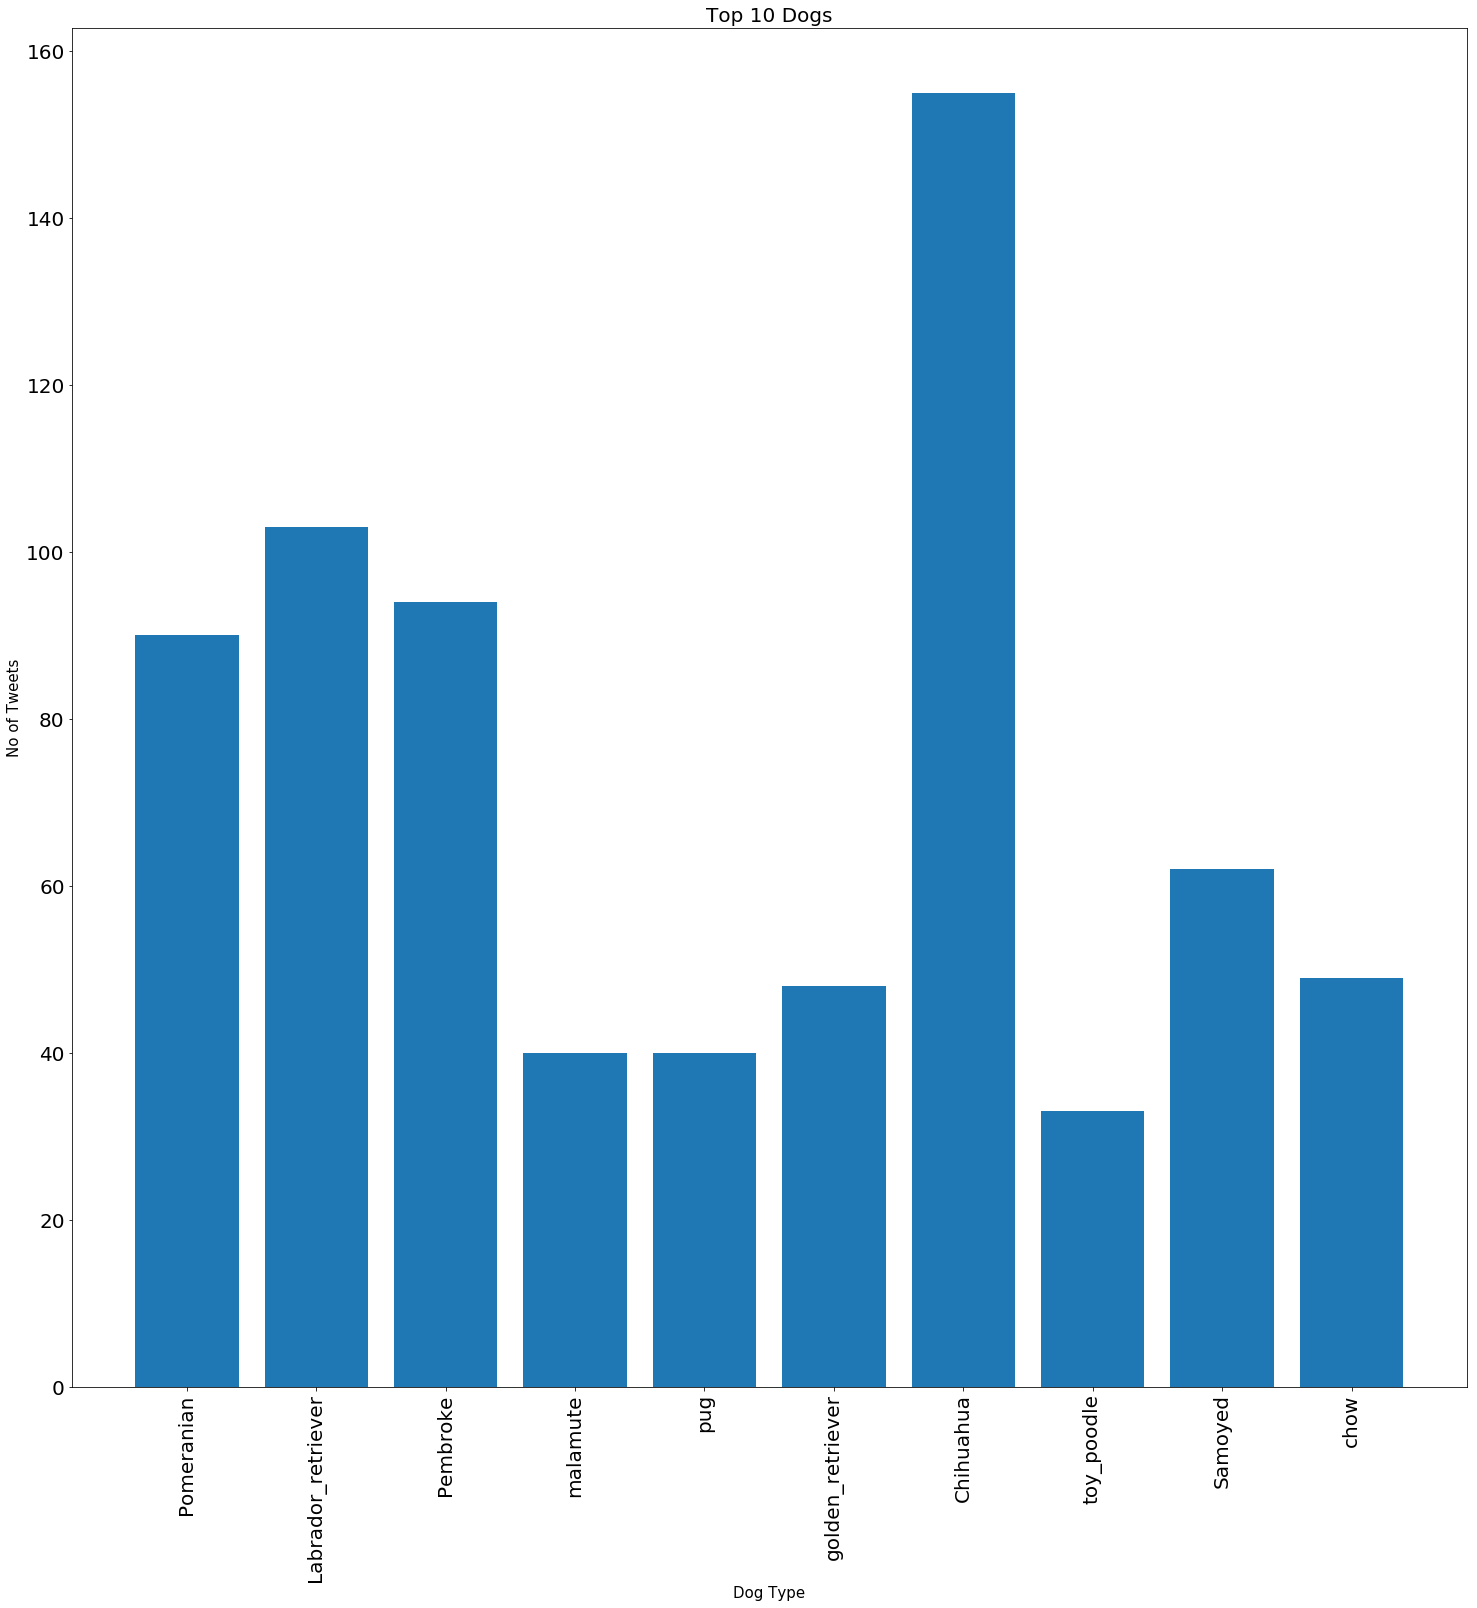

In [98]:
#Top 10 Dogs
viz3 = plt.figure(figsize = (25,25))
plt.bar(list(dict_dogs.keys()), list(dict_dogs.values()))
plt.xlabel('Dog Type', fontsize = 15)
plt.ylabel('No of Tweets', fontsize=15)
plt.xticks(list(dict_dogs.keys()), fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.title('Top 10 Dogs', fontsize = 20)
plt.savefig('Top 10 Dogs'+".jpg")
plt.show()